<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-input-and-output-time-series" data-toc-modified-id="Prepare-input-and-output-time-series-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare input and output time series</a></span></li><li><span><a href="#Prepare-the-training-data-for-the-LSTM" data-toc-modified-id="Prepare-the-training-data-for-the-LSTM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare the training data for the LSTM</a></span></li><li><span><a href="#Build-the-Keras-model-and-train-it" data-toc-modified-id="Build-the-Keras-model-and-train-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build the Keras model and train it</a></span></li><li><span><a href="#Test-prediction-on-train-data" data-toc-modified-id="Test-prediction-on-train-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test prediction on train data</a></span></li></ul></div>

<p style="text-align: center;">Long Short Term Memory (LSTM) example in Keras <br>for predicting time series<br>that uses multiple input features
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

# Prepare input and output time series

In [ ]:
import numpy as np

x = np.arange(0,100, 0.1)
x1 = [np.cos(value) for value in x]
x2 = []
value = 0.0
counter = -100
for i in range(0, len(x)):
    if counter<0:
        value -= 0.01
    if counter>0:
        value += 0.01
    counter +=1
    
    if counter==100:
        counter=-100
        
    x2.append(value)
x1 = np.array(x1)
x2 = np.array(x2)

y = (np.array(x1)+np.array(x2)) / 2.0

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x1, "blue")
plt.plot(x2, "red")
plt.title("Input time series")
plt.show()

plt.plot(y, "black")
plt.title("Output time series")
plt.show()



# Prepare the training data for the LSTM

In [ ]:
# The training data input for the Keras LSTM has to be matrix dataX
# with shape:
#   [samples, time steps, features]    

def to_sequence_data(inp_series1, inp_series2, out_series, n=3, m=1):
    dataX, dataY = [], []
    for i in range( len(inp_series1)-n-1 ):
        col1 = inp_series1[ i : i+n ]        
        col2 = inp_series2[ i : i+n ]
        
        M = np.zeros((n,2))
        M[:,0] = col1
        M[:,1] = col2
                
        dataX.append( M )
                
        dataY.append( out_series[ i : i+m ] )
    return np.array(dataX), np.array(dataY)

# Try case #1, then case #2, then case #3:

# Case #1:
# We have two input features x1,x2
trainX, trainY = to_sequence_data(x1,x2,y,3,1)

# Case #2:
# We have just input feature x1 available
#trainX, trainY = to_sequence_data(x1,x1,y,3,1)

# Case #3:
# We have just input feature x2 available
#trainX, trainY = to_sequence_data(x2,x2,y,3,1)


nr_training_samples = trainX.shape[0]
print("I have generated", nr_training_samples, "training samples.")

print("Shape of trainX is", trainX.shape)
print("Shape of trainY is", trainY.shape)

print("\n",trainX[0], "-->", trainY[0])
print("\n",trainX[1], "-->", trainY[1])
print("\n",trainX[2], "-->", trainY[2])

# Build the Keras model and train it

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

nr_inp_time_steps = 3
nr_input_features = 2

model = Sequential()
model.add(LSTM(4, input_shape=(nr_inp_time_steps, nr_input_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')    
model.fit(trainX,
          trainY,
          epochs=200,
          batch_size=32,
          verbose=2)

# Test prediction on train data

Shape of trainPredict is (996, 1)


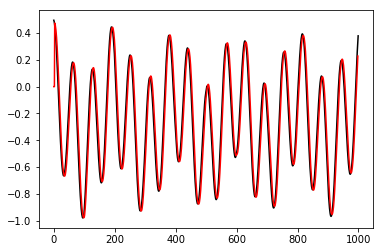

In [5]:
trainPredict = model.predict(trainX)
print("Shape of trainPredict is", trainPredict.shape)
trainPredict = trainPredict.reshape(-1)
#print(trainPredict)

# plot ground truth time series
plt.plot(y, "black")

# plot calculated time series
graph_pred_train = np.zeros(nr_inp_time_steps+len(trainPredict))
graph_pred_train[nr_inp_time_steps:] = trainPredict
plt.plot(graph_pred_train, "red")

plt.show()